In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

In [ ]:
load_dotenv()
API_KEY = os.getenv("DOG_API_KEY")
HEADERS = {"x-api-key": API_KEY}

In [11]:
# -----------------------------
# 1) Datenabruf
# -----------------------------
url = "https://api.thedogapi.com/v1/breeds"
response = requests.get(url, headers=HEADERS)

if response.status_code != 200:
    raise Exception(f"Fehler beim Abrufen der Daten: {response.status_code}")

data = response.json()
print(response)

<Response [200]>


In [12]:
# -----------------------------
# 2) Erste Übersicht
# -----------------------------
print(f"Anzahl Einträge: {len(data)}")
print("Beispiel-Einträge:")
for entry in data[:3]:
    print(entry)

Anzahl Einträge: 172
Beispiel-Einträge:
{'weight': {'imperial': '6 - 13', 'metric': '3 - 6'}, 'height': {'imperial': '9 - 11.5', 'metric': '23 - 29'}, 'id': 1, 'name': 'Affenpinscher', 'bred_for': 'Small rodent hunting, lapdog', 'breed_group': 'Toy', 'life_span': '10 - 12 years', 'temperament': 'Stubborn, Curious, Playful, Adventurous, Active, Fun-loving', 'origin': 'Germany, France', 'reference_image_id': 'BJa4kxc4X', 'image': {'id': 'BJa4kxc4X', 'width': 1600, 'height': 1199, 'url': 'https://cdn2.thedogapi.com/images/BJa4kxc4X.jpg'}}
{'weight': {'imperial': '50 - 60', 'metric': '23 - 27'}, 'height': {'imperial': '25 - 27', 'metric': '64 - 69'}, 'id': 2, 'name': 'Afghan Hound', 'country_code': 'AG', 'bred_for': 'Coursing and hunting', 'breed_group': 'Hound', 'life_span': '10 - 13 years', 'temperament': 'Aloof, Clownish, Dignified, Independent, Happy', 'origin': 'Afghanistan, Iran, Pakistan', 'reference_image_id': 'hMyT4CDXR', 'image': {'id': 'hMyT4CDXR', 'width': 606, 'height': 380, '

In [13]:
# -----------------------------
# 3) Filterung & Auswahl
# -----------------------------
# Wähle relevante Felder
df = pd.DataFrame(data)
df_filtered = df[['id', 'name', 'temperament']]

# Beispiel-Filter: alle Rassen mit 'Bulldog' im Namen
filter_term = 'Bulldog'
df_result = df_filtered[df_filtered['name'].str.contains(filter_term, case=False)]

print(f"\nGefilterte Ergebnisse ({filter_term}):")
print(df_result)


Gefilterte Ergebnisse (Bulldog):
      id                        name  \
6      7  Alapaha Blue Blood Bulldog   
9     10            American Bulldog   
80   113              French Bulldog   
118  179      Olde English Bulldogge   

                                           temperament  
6    Loving, Protective, Trainable, Dutiful, Respon...  
9    Friendly, Assertive, Energetic, Loyal, Gentle,...  
80   Playful, Affectionate, Keen, Sociable, Lively,...  
118  Friendly, Alert, Confident, Loving, Courageous...  


In [14]:
# -----------------------------
# 4) Export
# -----------------------------
os.makedirs('results', exist_ok=True)
df_result.to_csv("results/dog_breeds.csv", index=False, encoding='utf-8-sig')


C:\Users\Admin\AppData\Local\Temp\ipykernel_8240\3166986811.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['name_length'] = df_result['name'].apply(len)


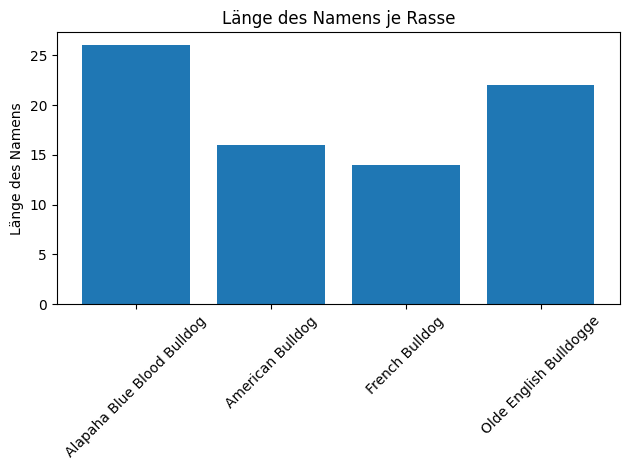

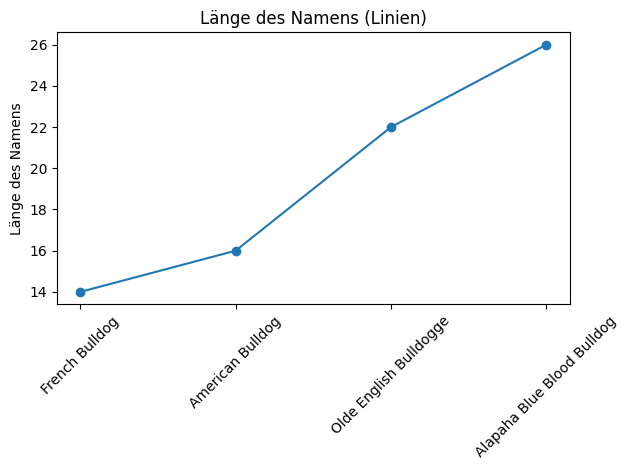

In [15]:
# -----------------------------
# 5) Visualisierung
# -----------------------------
# Balkendiagramm: Anzahl Buchstaben im Namen je Rasse
df_result['name_length'] = df_result['name'].apply(len)
plt.bar(df_result['name'], df_result['name_length'])
plt.xticks(rotation=45)
plt.ylabel("Länge des Namens")
plt.title("Länge des Namens je Rasse")
plt.tight_layout()
plt.savefig("results/name_length_bar.png")
plt.show()

# Liniendiagramm: Länge des Namens sortiert
df_result = df_result.sort_values('name_length')
plt.plot(df_result['name'], df_result['name_length'], marker='o')
plt.xticks(rotation=45)
plt.ylabel("Länge des Namens")
plt.title("Länge des Namens (Linien)")
plt.tight_layout()
plt.savefig("results/name_length_line.png")
plt.show()